In [1]:
# Import the neccessary modules
import pandas as pd
import numpy as np


In [2]:
import sys
!{sys.executable} -m pip install seaborn

     |████████████████████████████████| 292 kB 4.7 MB/s eta 0:00:01


In [3]:
import seaborn as sb

In [4]:
# Read the dataset into a dataframe
df = pd.read_csv('titanic.csv', sep='\t', engine='python')

In [5]:
# Drop some columns which is not relevant to the analysis (they are not numeric)
cols_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols_to_drop, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Sex          156 non-null    object 
 4   Age          126 non-null    float64
 5   SibSp        156 non-null    int64  
 6   Parch        156 non-null    int64  
 7   Fare         156 non-null    float64
 8   Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 11.1+ KB


<AxesSubplot:>

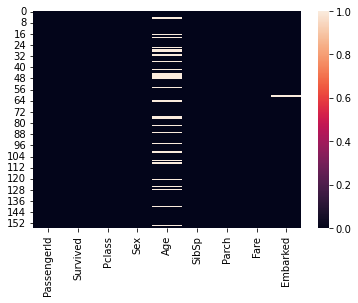

In [6]:
df.info()
sb.heatmap(df.isnull())

In [7]:
# To replace missing values with interpolated values, for example Age
df['Age'] = df['Age'].interpolate()

In [8]:
# Drop all rows with missin data
df = df.dropna()

In [9]:
# First, create dummy columns from the Embarked and Sex columns
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

In [10]:
df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1)

In [11]:
# Drop the redundant columns thus converted
df = df.drop(['Sex','Embarked'],axis=1)

In [12]:
# Seperate the dataframe into X and y data
X = df.values
y = df['Survived'].values

# Delete the Survived column from X
X = np.delete(X,1,axis=1)

In [13]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
# Using simple Decision Tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7872340425531915